**Author: Robert Džudžar**  <br>
[GitHub](https://github.com/rdzudzar) <br>
[Website](https://rdzudzar.github.io/)<br>
[Twitter](https://twitter.com/robertdzudzar)

**Proofreader/editor/tester: Niko Šarčević**<br>
[GitHub](https://github.com/nikosarcevic)<br>
[Website](https://nikosarcevic.com)<br>
[Twitter](https://twitter.com/NikoSarcevic)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports-and-setup" data-toc-modified-id="Imports-and-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and setup</a></span></li><li><span><a href="#Import-files" data-toc-modified-id="Import-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import files</a></span></li><li><span><a href="#What-is-Atomic-Hydrogen-&amp;-How-it-looks-when-we-observe-it?" data-toc-modified-id="What-is-Atomic-Hydrogen-&amp;-How-it-looks-when-we-observe-it?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>What is Atomic Hydrogen &amp; How it looks when we observe it?</a></span><ul class="toc-item"><li><span><a href="#Example-for-galaxy-ESO153-G017" data-toc-modified-id="Example-for-galaxy-ESO153-G017-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Example for galaxy ESO153-G017</a></span></li><li><span><a href="#Let's-hear-it!" data-toc-modified-id="Let's-hear-it!-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Let's hear it!</a></span></li></ul></li><li><span><a href="#Assymetry?" data-toc-modified-id="Assymetry?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Assymetry?</a></span><ul class="toc-item"><li><span><a href="#Let's-hear-it!" data-toc-modified-id="Let's-hear-it!-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Let's hear it!</a></span></li></ul></li><li><span><a href="#Galaxy-groups" data-toc-modified-id="Galaxy-groups-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Galaxy groups</a></span><ul class="toc-item"><li><span><a href="#Atomic-Hydrogen-spectra-for-each-detected-galaxy-in-the-group" data-toc-modified-id="Atomic-Hydrogen-spectra-for-each-detected-galaxy-in-the-group-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Atomic Hydrogen spectra for each detected galaxy in the group</a></span></li><li><span><a href="#Let's-hear-it!" data-toc-modified-id="Let's-hear-it!-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Let's hear it!</a></span></li></ul></li><li><span><a href="#Tweaking" data-toc-modified-id="Tweaking-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Tweaking</a></span><ul class="toc-item"><li><span><a href="#Sound-parameters-within-Astronify" data-toc-modified-id="Sound-parameters-within-Astronify-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Sound parameters within Astronify</a></span></li><li><span><a href="#We-can-roughly-animate-the-plot-and-play-the-sound" data-toc-modified-id="We-can-roughly-animate-the-plot-and-play-the-sound-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>We can roughly animate the plot and play the sound</a></span></li></ul></li></ul></div>

# Introduction

Hearing about Astronify package from [Nikolina Šarčević](https://twitter.com/NikoSarcevic), and after exploring it, I realise that: <br>

**i)** [Astronify](https://astronify.readthedocs.io/en/latest/astronify/index.html#) is a great tool to make data accessible to people with impaired vision, <br>

**ii)** I can make a contribution by creating a sonifying radio astronomy data - in particular, 21 cm emission from Atomic Hydrogen,

**iii)** Have a great time exploring how data sounds.

Main idea is to build a small project within a Jupyter Notebook to sonify examples of Atomic Hydrogen spectrum - for an individual galaxy and for a galaxy group - and here it is :)


# Imports and setup

In [1]:
# Astronify import
from astronify.series import SoniSeries
from astropy.table import Table

# General import
import numpy as np
import matplotlib.pyplot as plt

# In case you don't have some of the packages:
# !pip install package_name


WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/



In [2]:
# Define matplotlib parameters
import matplotlib
fsize = 20
matplotlib.rcParams.update(
    {'font.size': fsize, 'xtick.major.size': 10, 'ytick.major.size': 10, 'xtick.major.width': 1, 
     'ytick.major.width': 1, 'ytick.minor.size': 5, 'xtick.minor.size': 5, 'xtick.direction': 'in', 
     'ytick.direction': 'in', 'axes.linewidth': 1, 'text.usetex': False, 'font.family': 'serif',
      'legend.numpoints': 1, 'legend.columnspacing': 1,
     'legend.fontsize': fsize-4, 'xtick.top': True, 'ytick.right': True,
     'axes.grid': False, 'grid.color': 'lightgrey', 'grid.linestyle': ':','grid.linewidth': 3})

# Import files
Data are obtained with the Australia Telescope Compact Array (an array of six 2 m antennas used for radio astronomy). Each file contains galaxy spectra information: Channel, Velocity and Flux of the Atomic Hydrogen. 

These galaxies belong to the galaxy group called `HIPASS J0205-55` - composed of two subgroups `HIPASS J0205-55a` and `HIPASS J0205-55b` (more information available in [Dzudzar et al. 2020](https://arxiv.org/abs/2011.01438), page 25 and page 30) 

In [3]:
G1_channel, G1_velocity, G1_flux = np.loadtxt('g1', unpack=True)
G2_channel, G2_velocity, G2_flux = np.loadtxt('g2', unpack=True)
G3_channel, G3_velocity, G3_flux = np.loadtxt('g3', unpack=True)
G4_channel, G4_velocity, G4_flux = np.loadtxt('g4', unpack=True)
G5_channel, G5_velocity, G5_flux = np.loadtxt('g5', unpack=True)

# What is Atomic Hydrogen \& How it looks when we observe it?
Without going into too many details, we can say that a galaxy is composed out of stars, dust, gas and dark matter. The gaseous component in spiral galaxies is most often the **Atomic  Hydrogen (HI)**. This gas represents galaxy's reservoir from which it can form new stars in the future.

We observe Atomic Hydrogen by observing its **~21 cm emission** line, using radio telescopes. Important thing is that using these observations, we can study how much gas a galaxy has, how the gas moves, whether galaxy is disturbed, etc. 

The overall shape of 21 cm spectral line indicates motion and distribution of the gas, and the width of the line represents Doppler broadening (check [Doppler effect](https://en.wikipedia.org/wiki/Doppler_effect)) due to the rotation of the galaxy. Therefore, we can roughly say that we are observing **how gas in the galaxy rotates** (ignoring e.g. projection effects due to inclination)! Moreover, we will also show here not just how it looks like, but also, **how we can hear it!**

## Example for galaxy ESO153-G017
We have a flux on the *y*-axis and velocity on the *x*-axis. The <span style="color:blue">blue</span> side of the spectrum is the part of the galaxy that moves towards us - so we say it's <span style="color:blue">*the approaching side*</span>, while the <span style="color:red">red</span> part of the galaxy is the one that moves away from us - and we call it <span style="color:red">*the receeding side*</span>. The vertical line in the middle shows the systemic velocity of the galaxy - which can be used to calculate how far away the galaxy is. In this case it is roughly 300 million light years (check [Hubble's Law](https://en.wikipedia.org/wiki/Hubble%27s_law) for details).


Because this galaxy has a nice rotation (unfortunately, not all do!) -- we see a 21 cm line as so called **`Double horn`** profile. 

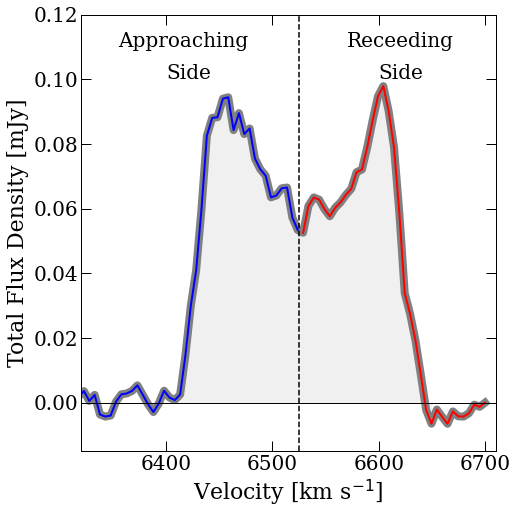

In [4]:
fig = plt.figure(figsize=(8,8))                                                               
ax = fig.add_subplot(1,1,1)                                                      

# Full spectrum
plt.plot(G1_velocity, G1_flux, 'grey', linewidth=8, label='ESO153-G017')

# Spectrum where Atomic Hydrogen emission is
ax.plot(G1_velocity[(G1_velocity>6200) & (G1_velocity<6525)],G1_flux[(G1_velocity>6200) & (G1_velocity<6525)], 'b-', color='blue', linewidth=2, label='')
ax.plot(G1_velocity[(G1_velocity>6525) & (G1_velocity<7525)],G1_flux[(G1_velocity>6525) & (G1_velocity<7525)], 'b-', color='red', linewidth=2, label='')

# Fill out the emission part
ax.fill_between(G1_velocity[(G1_velocity>6410) & (G1_velocity<6650)],G1_flux[(G1_velocity>6410) & (G1_velocity<6650)], 0, color='#f0f0f0' )

plt.axhline(0, color = 'k', linestyle = '-', linewidth = 1) 

plt.axvline(6525, color='k', linestyle='--')

plt.text(6355, 0.110, 'Approaching',fontsize=20)
plt.text(6400, 0.100, 'Side',fontsize=20)

plt.text(6570, 0.110, 'Receeding',fontsize=20)
plt.text(6600, 0.100, 'Side',fontsize=20)


plt.ylabel("Total Flux Density [mJy]", fontsize=22)
plt.xlabel("Velocity [km s$^{-1}$]", fontsize = 22)

plt.tight_layout()
plt.xlim(6320,6710)
plt.ylim(-0.015, 0.120)

plt.show()

## Let's hear it!
We place our data in the input format, and select a narrow velocity range (6320 - 6710 km/s) of our emission line. 

We use `Data Series Sonification` from the [Astronify](https://astronify.readthedocs.io/en/latest/astronify/index.html#) to sonify our spectrum. 

In [6]:
# Placing data into input Table
# We will place our Velocity information as a 'time' input
data_table = Table({"time": G1_velocity[(G1_velocity>6320) & (G1_velocity<6710)], 
                    "flux": G1_flux[(G1_velocity>6320) & (G1_velocity<6710)]})

# Sonify the data
soni_obj = SoniSeries(data_table)
soni_obj.note_spacing = 0.07 # Speed of the played sound, increase number to slow it down
soni_obj.sonify()
# Play
soni_obj.play()
# If you want to save it, uncomment the line below, it will save `Galaxy.mp3` file into your working directory
#soni_obj.write('Galaxy.mp3')

**How cool was that?! <br>**

We just represented the gas movement in the galaxy with sound!

We can hear that double-peaked signal: first we hear the noise - the deep sound. The pitch quickly rises for the first horn (the approaching side). After that, the frequency decreases a bit when it approaches the middle of the peak  - as it approaches the galaxy's systemic velocity. The pitch rises again for the receeding horn and finally falls quickly.

# Assymetry?

Sometimes galaxies have assymetric spectrum. <br>
For example, we show the spectrum of ESO153-IG016, which is very asymmetric -- there is no clear `double horn` profile.

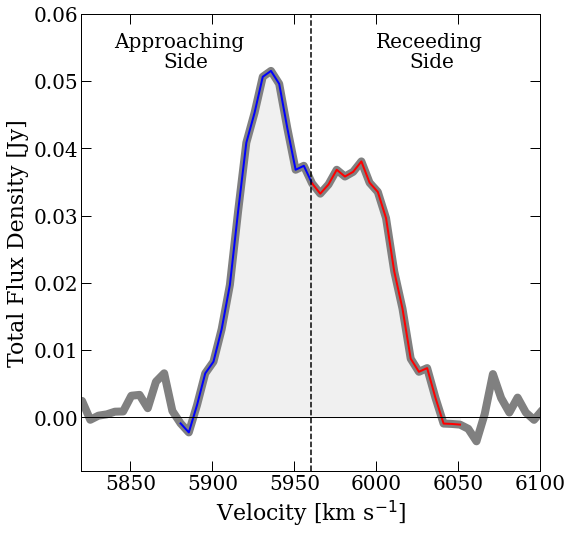

In [5]:
fig = plt.figure(figsize=(8,8))                                                               
ax = fig.add_subplot(1,1,1)                                                      

# Full spectrum
plt.plot(G2_velocity, G2_flux, 'grey', linewidth=8, label='ESO153-IG016')

# Spectrum where Atomic Hydrogen emission is
ax.plot(G2_velocity[(G2_velocity>5880) & (G2_velocity<=5961)],G2_flux[(G2_velocity>5880) & (G2_velocity<=5961)], 'b-', color='blue', linewidth=2, label='')
ax.plot(G2_velocity[(G2_velocity>5960) & (G2_velocity<6055)],G2_flux[(G2_velocity>5960) & (G2_velocity<6055)], 'b-', color='red', linewidth=2, label='')

# Fill out the emission part
ax.fill_between(G2_velocity[(G2_velocity>5880) & (G2_velocity<6055)], G2_flux[(G2_velocity>5880) & (G2_velocity<6055)], 0, color='#f0f0f0' )

plt.axhline(0, color = 'k', linestyle = '-', linewidth = 1) 

plt.axvline(5960, color='k', linestyle='--')

plt.text(5840, 0.055, 'Approaching',fontsize=20)
plt.text(5870, 0.052, 'Side',fontsize=20)

plt.text(6000, 0.055, 'Receeding',fontsize=20)
plt.text(6020, 0.052, 'Side',fontsize=20)


plt.ylabel("Total Flux Density [Jy]", fontsize=22)
plt.xlabel("Velocity [km s$^{-1}$]", fontsize = 22)

plt.tight_layout()
plt.xlim(5820,6100)
plt.ylim(-0.008, 0.060)

plt.show()

## Let's hear it!
We place our data in the input format, and select only a narrow velocity range (5820 - 6100 km/s) of our emission line. 

We use `Data Series Sonification` from the [Astronify](https://astronify.readthedocs.io/en/latest/astronify/index.html#) to sonify our spectrum. 


In [10]:
# Placing data into input Table
# We will place our Velocity information as a 'time' input
data_table = Table({"time": G2_velocity[(G2_velocity>5820) & (G2_velocity<6100)], 
                    "flux": G2_flux[(G2_velocity>5820) & (G2_velocity<6100)]})

# Sonify the data
soni_obj = SoniSeries(data_table)
soni_obj.note_spacing = 0.1 # Speed of the played sound, increase number to slow it down
soni_obj.sonify()
# Play
soni_obj.play()
# If you want to save it, uncomment line below, it will save `Galaxy.mp3` file into your working directory
#soni_obj.write('Galaxy.mp3')

Awesome! <br>
We also hear that there is no double-peaked sound, and can barely resolve any increase in the second peak.

# Galaxy groups

Galaxies tend to group together in pairs, triplets, or groups with more than 3 members. We can also find clusters with thousands of gravitationally bound galaxies. <br>

In this example, we are sonifying the galaxy group `HIPASS J0205-55` and its sub-groups. Mapping this group with the Australia Telescope Compact Array, we found Atomic Hydrogen emission in 5 galaxies.

## Atomic Hydrogen spectra for each detected galaxy in the group
Reproduced `Figure I1 b)` from [Dzudzar et al. 2020](https://arxiv.org/abs/2011.01438)

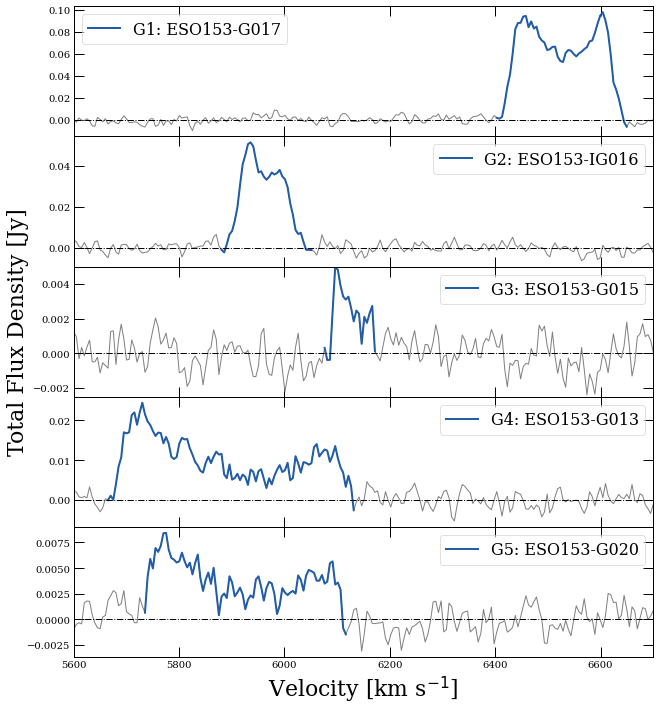

In [6]:
# Subplots
%matplotlib inline

num_rows = 5
num_cols = 1
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex='col', sharey='row', figsize=(9,10))

# Data in mJy -- full spectra
ax[0].plot(G1_velocity, G1_flux, 'b-', color='grey', linewidth=1, label='')
ax[1].plot(G2_velocity, G2_flux, 'c-', color='grey', linewidth=1, label='')
ax[2].plot(G3_velocity, G3_flux, 'c-', color='grey', linewidth=1, label='')
ax[3].plot(G4_velocity, G4_flux, 'c-', color='grey', linewidth=1, label='')
ax[4].plot(G5_velocity, G5_flux, 'c-', color='grey', linewidth=1, label='')

# Data in mJy -- highlighted Atomic Hydrogen emission lines
ax[0].plot(G1_velocity[(G1_velocity>6400) & (G1_velocity<6650)], G1_flux[(G1_velocity>6400) & (G1_velocity<6650)], 'b-', color='#225ea8', linewidth=2, label='G1: ESO153-G017')
ax[1].plot(G2_velocity[(G2_velocity>5880) & (G2_velocity<6055)], G2_flux[(G2_velocity>5880) & (G2_velocity<6055)], 'c-', color='#225ea8', linewidth=2, label='G2: ESO153-IG016')
ax[2].plot(G3_velocity[(G3_velocity>6075) & (G3_velocity<6175)], G3_flux[(G3_velocity>6075) & (G3_velocity<6175)], 'c-', color='#225ea8', linewidth=2, label='G3: ESO153-G015')
ax[3].plot(G4_velocity[(G4_velocity>5665) & (G4_velocity<6135)], G4_flux[(G4_velocity>5665) & (G4_velocity<6135)], 'c-', color='#225ea8', linewidth=2, label='G4: ESO153-G013')
ax[4].plot(G5_velocity[(G5_velocity>5735) & (G5_velocity<6120)], G5_flux[(G5_velocity>5735) & (G5_velocity<6120)], 'c-', color='#225ea8', linewidth=2, label='G5: ESO153-G020')

# Add legend information
font_label_size = 22
for i in np.arange(num_rows):
    ax[i].axhline(0, color = 'k', linestyle = '-.',linewidth = 1)
    ax[i].legend(loc=0,frameon=True,fancybox=True, framealpha=0.6, fontsize=16)

# Plot details
plt.xlabel("Velocity [km s$^{-1}$]", fontsize = font_label_size)
plt.tight_layout()

plt.xlim(5600,6700)
ax[2].set_ylim(-0.0025, 0.005)
ax[2].set_ylabel("Total Flux Density [Jy]", fontsize=22)

plt.subplots_adjust(wspace = 0.0, hspace = 0.0)

plt.show()

## Let's hear it!
We can play all files simultaneously and hear how this galaxy group sounds! :)


In [12]:
# We build the data table for each galaxy
data_table_hi_1 = Table({"time": G1_velocity, #setting as velocity
                    "flux": G1_flux})

data_table_hi_2 = Table({"time": G2_velocity, #setting as velocity
                    "flux": G2_flux})

data_table_hi_3 = Table({"time": G3_velocity, #setting as velocity
                    "flux": G3_flux})

data_table_hi_4 = Table({"time": G4_velocity, #setting as velocity
                    "flux": G4_flux})

data_table_hi_5 = Table({"time": G5_velocity, #setting as velocity
                    "flux": G5_flux})

In [13]:
# We make each Sonify object and play it simultaneously, with the same note_spacing (speed)

note_spacing = 0.07

soni_obj_1 = SoniSeries(data_table_hi_1)

soni_obj_1.note_spacing = note_spacing
soni_obj_1.sonify()
soni_obj_1.play()

soni_obj_2 = SoniSeries(data_table_hi_2)
soni_obj_2.note_spacing = note_spacing
soni_obj_2.sonify()
soni_obj_2.play()

soni_obj_3 = SoniSeries(data_table_hi_3)
soni_obj_3.note_spacing = note_spacing
soni_obj_3.sonify()
soni_obj_3.play()

soni_obj_4 = SoniSeries(data_table_hi_4)
soni_obj_4.note_spacing = note_spacing
soni_obj_4.sonify()
soni_obj_4.play()

soni_obj_5 = SoniSeries(data_table_hi_5)
soni_obj_5.note_spacing = note_spacing
soni_obj_5.sonify()
soni_obj_5.play()


**JUST WOW!**

We notice (HEAR!) that the signal from the galaxies does not appear at the same time - that is because every galaxy is at a different distance in a group. In other words, the point where the signal from the galaxy appears is both visualised and sonified! 

At first, we can hear two galaxies (G4 and G5) rougly at the same time. Next, as the sound progresses we hear one high pitch noise - signaling a new galaxy (G2) and then yet another high-pitch signal - another galaxy (G3)! We can then hear the background noise for a bit, as the next galaxy is a bit further away. Finally we get to hear the highest-pitch sound which comes from the galaxy G! in the plot. 

As you probably noticed, noise has a low-pitch sound, and with the increase of the Atomic Hydrogen Flux in a galaxy (within this galaxy group), galaxy will produce a higher-pitch tone. 

# Tweaking 

## Sound parameters within Astronify

There are possibilities to adjust the sounds for a better output, see details [here].(https://astronify.readthedocs.io/en/latest/astronify/Intro_Astronify_Series.html) <br>

In the example below, we are defining a `zero_point` at 0.001 and the `stretch` of the sound, from default 'linear' to 'log'. There are more options available to be explored and the plan is to investigate this in the near future. For now, we are only going to tweak the zero point and the stretch.

In [14]:
# We make each Sonify object and play them at the same time, with the same note_spacing (speed)

note_spacing = 0.07
zero_point = 0.001
stretch = 'log'
    
soni_obj_1 = SoniSeries(data_table_hi_1)

soni_obj_1.note_spacing = note_spacing
soni_obj_1.pitch_mapper.pitch_map_args
{"zero_point": zero_point,
"stretch": stretch}

soni_obj_1.sonify()
soni_obj_1.play()

soni_obj_2 = SoniSeries(data_table_hi_2)
soni_obj_2.note_spacing = note_spacing
soni_obj_2.pitch_mapper.pitch_map_args
{"zero_point": zero_point,
"stretch": stretch}

soni_obj_2.sonify()
soni_obj_2.play()

soni_obj_3 = SoniSeries(data_table_hi_3)
soni_obj_3.note_spacing = note_spacing
soni_obj_3.pitch_mapper.pitch_map_args
{"zero_point": zero_point,
"stretch": stretch}

soni_obj_3.sonify()
soni_obj_3.play()

soni_obj_4 = SoniSeries(data_table_hi_4)
soni_obj_4.note_spacing = note_spacing
soni_obj_4.pitch_mapper.pitch_map_args
{"zero_point": zero_point,
"stretch": stretch}

soni_obj_4.sonify()
soni_obj_4.play()

soni_obj_5 = SoniSeries(data_table_hi_5)
soni_obj_5.note_spacing = note_spacing
soni_obj_5.pitch_mapper.pitch_map_args
{"zero_point": zero_point,
"stretch": stretch}

soni_obj_5.sonify()
soni_obj_5.play()


## We can roughly animate the plot and play the sound
Although not 100% correct matching, here is a nice animation between the Visual and Sound properties. <br>

Sometimes animation is lagging behind the sound, since here we have to use `%matplotlib notebook` in order for it to work. Try re-running the cell below multiple times if there is an issue.

<IPython.core.display.Javascript object>


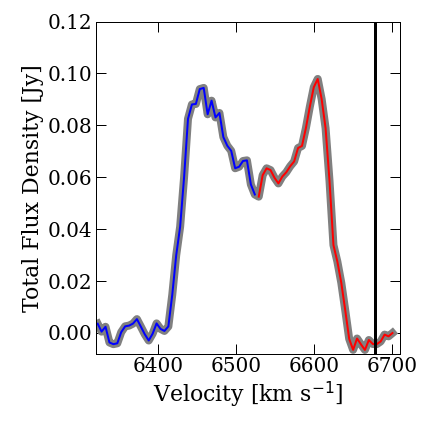

In [8]:
#from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
%matplotlib notebook

duration = 7000 # in sec
refreshPeriod = 100 # in ms

fig,ax = plt.subplots(figsize=(6,6))

plt.plot(G1_velocity[(G1_velocity>6320) & (G1_velocity<6710)], G1_flux[(G1_velocity>6320) & (G1_velocity<6710)], 'grey', linewidth=8, label='ESO153-G017')
# Spectrum where Atomic Hydrogen emission is
ax.plot(G1_velocity[(G1_velocity>6320) & (G1_velocity<6525)],G1_flux[(G1_velocity>6320) & (G1_velocity<6525)], 'b-', color='blue', linewidth=2, label='')
ax.plot(G1_velocity[(G1_velocity>6525) & (G1_velocity<7525)],G1_flux[(G1_velocity>6525) & (G1_velocity<7525)], 'b-', color='red', linewidth=2, label='')
plt.ylabel("Total Flux Density [Jy]", fontsize=22)
plt.xlabel("Velocity [km s$^{-1}$]", fontsize = 22)

plt.tight_layout()
plt.xlim(6320,6710)
plt.ylim(-0.008, 0.12)

# Line Animation
vl = ax.axvline(6320, ls='-', color='k', lw=3, zorder=10)

def animate(i, vl, period):
    t = i*period/14
    vl.set_xdata([t+6320,t+6320])
    return vl

ani = animation.FuncAnimation(fig, animate, frames=int(duration/(refreshPeriod/1)), fargs=(vl,refreshPeriod), interval=refreshPeriod)
plt.show()

# SOUND

# Placing data into input Table
# We will place our Velocity information as a 'time' input
data_table = Table({"time": G1_velocity[(G1_velocity>6320) & (G1_velocity<6710)], 
                    "flux": G1_flux[(G1_velocity>6320) & (G1_velocity<6710)]})

# Sonify the data
soni_obj = SoniSeries(data_table)
soni_obj.note_spacing = 0.07 # Speed of the played sound, increase number to slow it down
soni_obj.sonify()
# Play
soni_obj.play()
# If you want to save it, uncomment the line below, it will save `Galaxy.mp3` file into your working directory
#soni_obj.write('Galaxy.mp3')